In [2]:
from fastai.vision.all import *

In [4]:
from fastai.data.transforms import *
classes = [
    "bB",
    "bK",
    "bN",
    "bP",
    "bQ",
    "bR",
    "wB",
    "wK",
    "wN",
    "wP",
    "wQ",
    "wR",
]
files = get_image_files("./training_images", folders=classes)
print(len(files))
print(files[0])


258
training_images/bP/california.png


In [5]:
pattern = r'^.*/(.*)/.*\.png'
import re
re.compile(pattern).match(str(files[0])).group(1)
# print(str(files[0]))

'bP'

In [7]:
import os
data_loaders = ImageDataLoaders.from_path_re(os.getcwd(), files, pattern, batch_tfms=aug_transforms(max_zoom=1.0, max_lighting=0, max_warp=0, max_rotate=0))


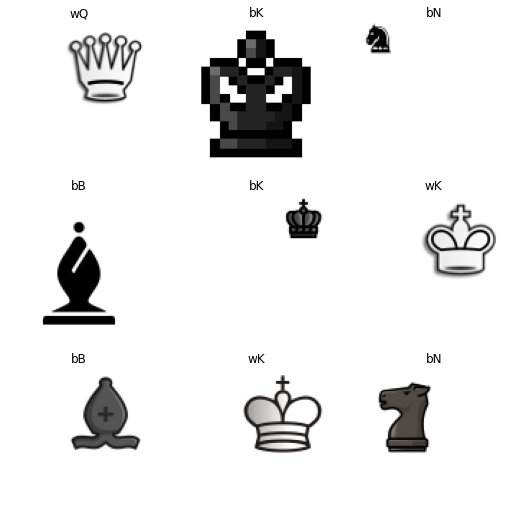

In [8]:
data_loaders.show_batch()

In [9]:
learn = cnn_learner(data_loaders, resnet34, metrics=error_rate)

[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNati

SuggestedLRs(valley=0.0020892962347716093)

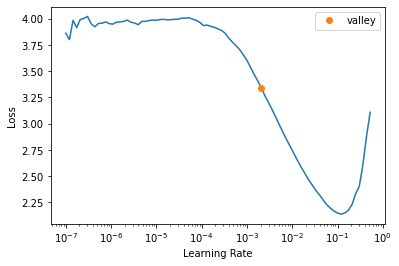

In [81]:
set_num_threads(0)
learn.lr_find()

In [10]:
learn.fine_tune(6, 2e-3)

epoch,train_loss,valid_loss,error_rate,time
0,3.929908,2.518775,0.725490,00:16


[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNati

epoch,train_loss,valid_loss,error_rate,time
0,3.364796,2.206189,0.627451,00:23
1,2.798087,1.924876,0.666667,00:23
2,2.275676,1.819531,0.588235,00:23
3,1.927236,1.748021,0.588235,00:22
4,1.672438,1.659632,0.529412,00:23
5,1.487958,1.619012,0.509804,00:23


[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNati

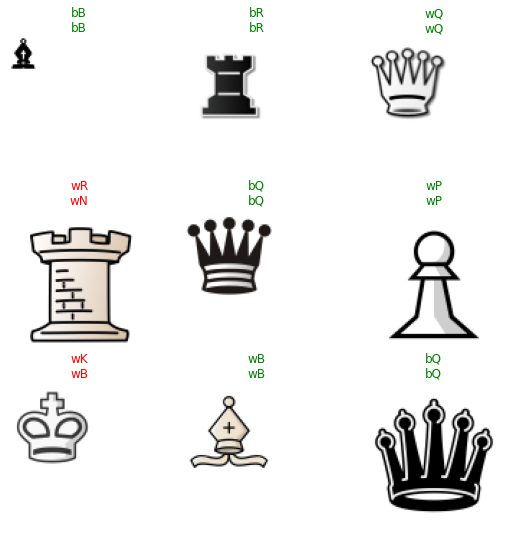

In [84]:
learn.show_results()

[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNati

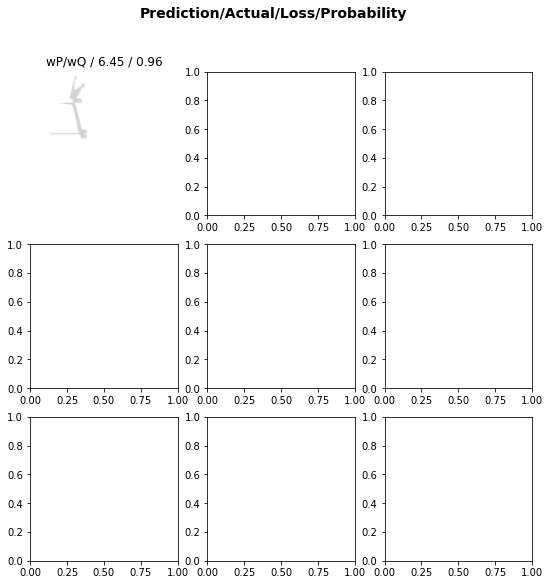

In [43]:
interpretation = Interpretation.from_learner(learn)
interpretation.plot_top_losses(9)